# Install dependencies

In [ ]:
!pip install -r requirements.txt

# Import dependencies

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import imghdr
import cv2
import os

2022-11-19 14:43:44.599463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 14:43:44.909123: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 14:43:46.524058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-19 14:43:46.524215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

# GPU setup 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Load data and split it for training/validation/test data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('training_data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

Found 146 files belonging to 2 classes.


2022-11-19 14:44:39.098680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/szymon/anaconda3/envs/safetysystem/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-19 14:44:39.098718: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 14:44:39.098745: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (szymon-G3-3590): /proc/driver/nvidia/version does not exist
2022-11-19 14:44:39.099145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(array([[[[0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          ...,
          [0.972549  , 0.84705883, 0.75686276],
          [0.97140014, 0.84590995, 0.7557138 ],
          [0.96862745, 0.84313726, 0.7529412 ]],
 
         [[0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          ...,
          [0.972549  , 0.84705883, 0.75686276],
          [0.97247493, 0.84698474, 0.7567887 ],
          [0.97229624, 0.84680605, 0.75661   ]],
 
         [[0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          [0.99215686, 0.87058824, 0.7921569 ],
          ...,
          [0.9743402 , 0.84885   , 0.75865394],
          [0.972549  , 0.84705883, 0.75686276],
          [0.972549  , 0.84705883, 0.75686276]],
 
         ...,
 
         [[0.94509804, 0.7882353 , 0.6862745 ],
          [0.94232

In [4]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)
print(test_size)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
if test_size == 0:
    raise ValueError("Test size is null, you should have at least 140 data images to fix this issue")

1


# Build model

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

# Training model

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-11-19 14:44:49.723173: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.
2022-11-19 14:44:51.636012: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 8s - loss: 0.7074 - accuracy: 0.5312

2022-11-19 14:44:52.280021: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.
2022-11-19 14:44:53.895405: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.


2/3 [===================>..........] - ETA: 2s - loss: 0.9748 - accuracy: 0.5156

2022-11-19 14:44:54.468531: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.


3/3 [==============================] - 10s 3s/step - loss: 1.0794 - accuracy: 0.5104 - val_loss: 0.8764 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 10s 3s/step - loss: 0.6780 - accuracy: 0.7917 - val_loss: 0.8071 - val_accuracy: 0.3750
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.6829 - accuracy: 0.5417 - val_loss: 0.6221 - val_accuracy: 0.4688
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.5444 - accuracy: 0.6562 - val_loss: 0.4362 - val_accuracy: 0.9375
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.3878 - accuracy: 0.9271 - val_loss: 0.4713 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.2776 - accuracy: 0.9271 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.2048 - accuracy: 0.9375 - val_loss: 0.2380 - val_accuracy: 0.8438
Epoch 8/20
3/3 [==============================] - 

# Test resoults

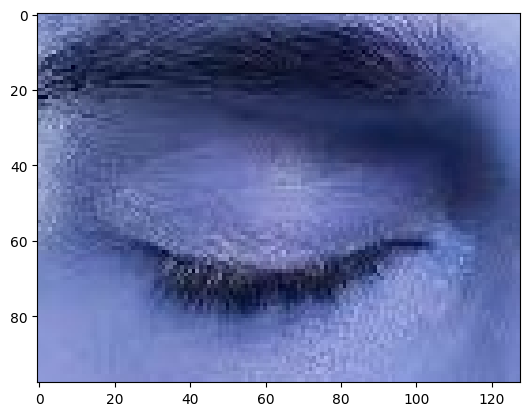

In [39]:
img = cv2.imread('training_data/close_eye/closed_eye (89).jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(img)
plt.show()

In [40]:
my_pred = model.predict(np.expand_dims(resize/255, 0))
my_pred

1/1 [==============================] - 0s 98ms/step


array([[0.00505351]], dtype=float32)

In [41]:
if my_pred > 0.3: 
    print(f'Predicted class is eye')  
else:
    print(f'Predicted class is No eye')

Predicted class is No eye


# Save model

In [22]:
model.save(os.path.join('models','my_new_model.h5'))